sko mhuerta

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


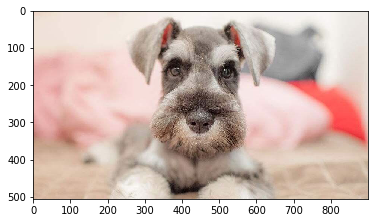

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

file_path = '/content/drive/My Drive/ References/ecole42/project/rushes/numpy/'
img_original = mpimg.imread(file_path + 'dog.jpg')
plt.imshow(img_original)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


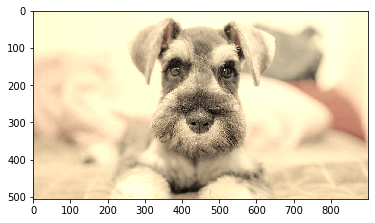

In [3]:
#image sepia
'''
A sepia operation is equivalent to the following matrix operation:
  | R' |     |0.393+0.607s  0.769-0.769s  0.189-0.189s 0  0 |   | R |
  | G' |     |0.349-0.349s  0.686+0.314s  0.168-0.168s 0  0 |   | G |
  | B' |  =  |0.272-0.272g  0.534-0.534g  0.131+0.869g 0  0 | * | B |
  | A' |     |          0             0             0  1  0 |   | A |
  | 1  |     |          0             0             0  0  1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#sepiaEquivalent
'''
img_proc = img_original.astype(int);
image_sepia = np.zeros(img_proc.shape, img_proc.dtype)
s = 0.3
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_sepia[width, height] = [(0.393+0.607*s)*r + (0.769-0.769*s)*g + (0.189-0.189*s)*b,
          (0.349-0.349*s)*r + (0.686+0.314*s)*g + (0.168-0.168*s)*b,
          (0.272-0.272*s)*r + (0.534-0.534*s)*g + (0.131+0.869*s)*b]
plt.imshow(image_sepia)

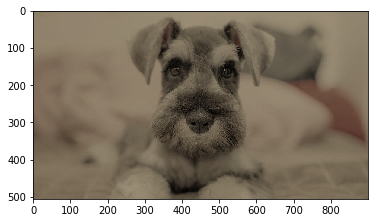

In [4]:
#image contrast
'''
Adjusts the contrast.
  A contrast operation is equivalent to the following matrix operation:
      | R' |     | c  0  0  0  -0.5c+0.5 |   | R |
      | G' |     | 0  c  0  0  -0.5c+0.5 |   | G |
      | B' |  =  | 0  0  c  0  -0.5c+0.5 | * | B |
      | A' |     | 0  0  0  1          0 |   | A |
      | 1  |     | 0  0  0  0          1 |   | 1 |
  See the W3C document:
  https://www.w3.org/TR/filter-effects-1/#contrastEquivalent.
'''
c = 1.5
img_proc = image_sepia.astype(int);
image_contrast = np.zeros(img_proc.shape, img_proc.dtype)
c = 0.5
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_contrast[width, height] = [
          c*(r - 0.5) + 0.5,
          c*(g - 0.5) + 0.5,
          c*(b - 0.5) + 0.5]
plt.imshow(image_contrast.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


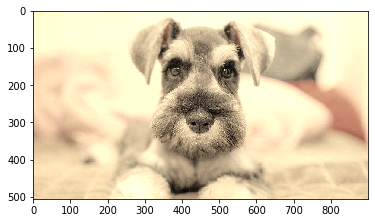

In [5]:
#image brightness
'''
purpose : adjusts the brightness
  A brightness matrix operation:
      | R' |     | c  0  0 |   | R |
      | G' |  =  | 0  c  0 | * | G |
      | B' |     | 0  0  c |   | B |
  W3C reference:
  https://www.w3.org/TR/filter-effects-1/#brightnessEquivalent
'''
c_b = 2.0
img_proc = image_contrast.astype(int);
image_brightness = np.zeros(img_proc.shape, img_proc.dtype)
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_brightness[width, height] = [
          c_b*r,
          c_b*g,
          c_b*b]
plt.imshow(image_brightness.astype(int))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


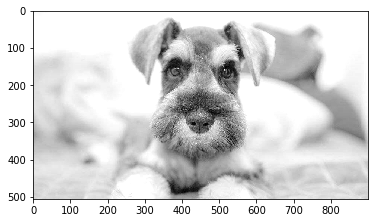

In [6]:
#image grayscale
"""
Converts image to grayscale
  A grayscale matrix operation:
  | R' |     |0.2126+0.7874g  0.7152-0.7152g  0.0722-0.0722g 0  0 |   | R |
  | G' |     |0.2126-0.2126g  0.7152+0.2848g  0.0722-0.0722g 0  0 |   | G |
  | B' |  =  |0.2126-0.2126g  0.7152-0.7152g  0.0722+0.9278g 0  0 | * | B |
  | A' |     |            0               0               0  1  0 |   | A |
  | 1  |     |            0               0               0  0  1 |   | 1 |
  W3C reference:
  https://www.w3.org/TR/filter-effects-1/#grayscaleEquivalent
"""
amount = 1
ga = 0
img_proc = image_brightness.astype(int)
image_grayscale = np.zeros(img_proc.shape, img_proc.dtype)
for width in range(img_proc.shape[0]):
    for height in range(img_proc.shape[1]):
        r = img_proc[width, height][0]
        g = img_proc[width, height][1]
        b = img_proc[width, height][2]
        image_grayscale[width, height] =[
          (0.2126+0.7874*ga)*r + (0.7152-0.7152*ga)*g + (0.0722-0.0722*ga)*b,
          (0.2126-0.2126*ga)*r + (0.7152+0.2848*ga)*g + (0.0722-0.0722*ga)*b,
          (0.2126-0.2126*ga)*r + (0.7152-0.7152*ga)*g + (0.0722+0.9278*ga)*b]
plt.imshow(image_grayscale.astype(int))

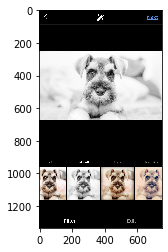

In [7]:
file = file_path + 'inkwell_dog.jpg'
img_inkwell = mpimg.imread(file)
plt.imshow(img_inkwell)